# Feature Encoding

datasets:

https://www.openml.org/search?type=data&status=active

In [5]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
from matplotlib import cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import export_text
plt.style.use("ggplot")

In [18]:
credit = oml.datasets.get_dataset(31)
X, y, _, _ = credit.get_data(target=credit.default_target_attribute); 
attribute_names = list(X)

In [19]:
X.head()

,checking_status,duration,credit_history,purpose,...,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,...,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,...,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,...,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,...,skilled,2,none,yes
4,<0,24,delayed previously,new car,...,skilled,2,none,yes


In [10]:
y.head()

0    good
1     bad
2    good
3    good
4     bad
Name: class, dtype: category
Categories (2, object): ['good' < 'bad']

In [11]:
attribute_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [12]:
df = X[['credit_history', 'purpose', 'credit_amount', 'savings_status',
        'existing_credits', 'job', 'own_telephone','foreign_worker']].copy()
df.head()

,credit_history,purpose,credit_amount,savings_status,existing_credits,job,own_telephone,foreign_worker
0,critical/other existing credit,radio/tv,1169.0,no known savings,2,skilled,yes,yes
1,existing paid,radio/tv,5951.0,<100,1,skilled,none,yes
2,critical/other existing credit,education,2096.0,<100,1,unskilled resident,none,yes
3,existing paid,furniture/equipment,7882.0,<100,1,skilled,none,yes
4,delayed previously,new car,4870.0,<100,2,skilled,none,yes


## Quick Exploration


In [17]:
df

,credit_history,purpose,credit_amount,savings_status,existing_credits,job,own_telephone,foreign_worker
0,critical/other existing credit,radio/tv,1169.0,no known savings,2,skilled,yes,yes
1,existing paid,radio/tv,5951.0,<100,1,skilled,none,yes
2,critical/other existing credit,education,2096.0,<100,1,unskilled resident,none,yes
3,existing paid,furniture/equipment,7882.0,<100,1,skilled,none,yes
4,delayed previously,new car,4870.0,<100,2,skilled,none,yes
...,...,...,...,...,...,...,...,...
995,existing paid,furniture/equipment,1736.0,<100,1,unskilled resident,none,yes
996,existing paid,used car,3857.0,<100,1,high qualif/self emp/mgmt,yes,yes
997,existing paid,radio/tv,804.0,<100,1,skilled,none,yes
998,existing paid,radio/tv,1845.0,<100,1,skilled,yes,yes


In [13]:
df["credit_history"].value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

<AxesSubplot:title={'center':'Credit History'}>

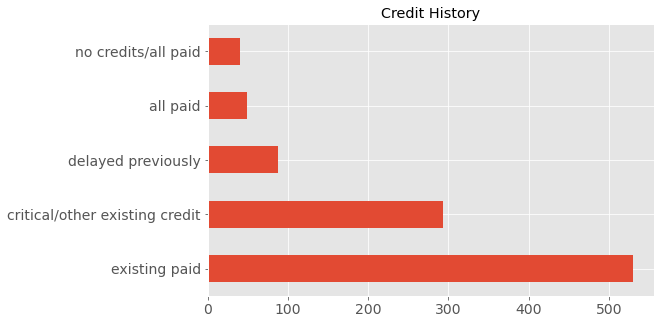

In [14]:
df["credit_history"].value_counts().plot(kind="barh", title="Credit History", fontsize=14, figsize=(8,5))

## Exercise 1 - Support Distance Algorithms


### Exercise 1.1

Convert all categorical features to support one-hot-vector encoding. 

In [16]:
one_hot_data = pd.get_dummies(df)
one_hot_data.head()

,credit_amount,existing_credits,credit_history_no credits/all paid,credit_history_all paid,...,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
0,1169.0,2,0,0,...,0,1,1,0
1,5951.0,1,0,0,...,1,0,1,0
2,2096.0,1,0,0,...,1,0,1,0
3,7882.0,1,0,0,...,1,0,1,0
4,4870.0,2,0,0,...,1,0,1,0


### Exercise 1.2

Normalize all features to the closed range zero to one.

In [22]:
for column in one_hot_data:
    one_hot_data[column] = (one_hot_data[column] -  one_hot_data[column].min()) / (one_hot_data[column].max() - one_hot_data[column].min())
one_hot_data.head()

,credit_amount,existing_credits,credit_history_no credits/all paid,credit_history_all paid,...,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
0,0.05,0.33,0.0,0.0,...,0.0,1.0,1.0,0.0
1,0.31,0.00,0.0,0.0,...,1.0,0.0,1.0,0.0
2,0.10,0.00,0.0,0.0,...,1.0,0.0,1.0,0.0
3,0.42,0.00,0.0,0.0,...,1.0,0.0,1.0,0.0
4,0.25,0.33,0.0,0.0,...,1.0,0.0,1.0,0.0


### Exercise 1.3

Remove all NULL values

In [29]:
one_hot_data.isna().sum()

credit_amount                                       0
existing_credits                                    0
credit_history_no credits/all paid                  0
credit_history_all paid                             0
credit_history_existing paid                        0
credit_history_delayed previously                   0
credit_history_critical/other existing credit       0
purpose_new car                                     0
purpose_used car                                    0
purpose_furniture/equipment                         0
purpose_radio/tv                                    0
purpose_domestic appliance                          0
purpose_repairs                                     0
purpose_education                                   0
purpose_vacation                                 1000
purpose_retraining                                  0
purpose_business                                    0
purpose_other                                       0
savings_status_<100         

In [32]:
one_hot_data.drop(columns=["purpose_vacation"], inplace=True)

In [33]:
one_hot_data.isna().sum()

credit_amount                                    0
existing_credits                                 0
credit_history_no credits/all paid               0
credit_history_all paid                          0
credit_history_existing paid                     0
credit_history_delayed previously                0
credit_history_critical/other existing credit    0
purpose_new car                                  0
purpose_used car                                 0
purpose_furniture/equipment                      0
purpose_radio/tv                                 0
purpose_domestic appliance                       0
purpose_repairs                                  0
purpose_education                                0
purpose_retraining                               0
purpose_business                                 0
purpose_other                                    0
savings_status_<100                              0
savings_status_100<=X<500                        0
savings_status_500<=X<1000     

### Exercise 1.4

Run K-Means and use the elbow method to estimate the number of clusters. 

![K_Means_Elbow_Method](https://raw.githubusercontent.com/satishgunjal/images/master/K_Means_Elbow_Method.png)


In [32]:
def get_kmeans_accuracy(data, top_k):
    sum_squared = []
    silhouette = []
    K = range(2, top_k)
    for i in K:
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(data)
        sum_squared.append(kmeans.inertia_)
        silhouette.append(silhouette_score(data, kmeans.labels_))
    return pd.DataFrame({
    "K": K,
    "SSE": sum_squared,
    "SIL": silhouette
  })

### Exercise 1.5

1. Choose the near optimal K by the elbow method. 
2. Create the clusters and plot their silhouette score.

## Exercise 2 - Support Non-Metric Algorithms


### Exercise 2.1

Encode variables using LabelEncoder


### Exercise 2.2

Use 25% of training set and evaulate the results (present the confusion matrix)

In [62]:
x_train,x_test,y_train,y_test = train_test_split(new_df,y, test_size=0.25)

### Exercise 2.3

Use the target variable and train Decision Tree classifier.

### Exercise 2.4

Print the confusion matrix and the accuracy score of the model.

In [1]:
# print(export_text(tree, feature_names=list(new_df.columns)))

## Based on this result, what is the major problem of single decision tree?